In [3]:
# 사용할 패키지를 import합니다
import sys
print('python', sys.version)

import numpy as np
print('numpy', np.__version__)

import pandas as pd
print('pandas', pd.__version__)

import matplotlib as mpl
print('matplotlib', mpl.__version__)

import matplotlib.pyplot as plt

import seaborn as sns
print('seaborn', sns.__version__)

# 결과 확인을 용이하게 하기 위한 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# figure에 한글 폰트 사용을 위한 코드
plt.rc("font", family="Malgun Gothic") # window
#plt.rc("font", family="AppleGothic") # mac
from matplotlib.ticker import MaxNLocator

# dataframe 39 column 까지 표시
pd.options.display.max_columns=39

python 3.12.5 (tags/v3.12.5:ff3bc82, Aug  6 2024, 20:45:27) [MSC v.1940 64 bit (AMD64)]
numpy 2.2.6
pandas 2.2.3
matplotlib 3.10.3
seaborn 0.13.2


# 데이터 로드 & 전처리 (상가정보_서울부산_sampled.csv)

In [4]:
df=pd.read_csv('data/상가정보_서울부산_sampled.csv', sep=',') # 원래 데이터에서 1/3 씩 랜덤하게 샘플링함
## step1: 결측치가 전체 데이터의 수의 5% 이상인 column 제거
n1 = df.isnull().sum(axis=0).sort_values(ascending=False)
n2=(n1/len(df))*100
n3=n2.loc[n2>=5]
df2 = df.drop(columns=n3.index)

## step2: column이름에 '번호' 또는 '코드'가 포함되어 있는 column 제거  (단 상가업소번호는 포함)
cols = df2.columns
cols_code = cols[(cols.str.contains("코드|번호"))&(cols!='상가업소번호')]
dfs = df2.drop(columns=cols_code)

## data 확인
dfs.head(1)
dfs.shape

,상가업소번호,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,MA0106202307A0467187,츠키요와,음식,일식,일식 회/초밥,일식 음식점업,서울특별시,강남구,청담동,청담동,대지,83.0,서울특별시 강남구 청담동 83-17,서울특별시 강남구 선릉로158길,13.0,서울특별시 강남구 선릉로158길 13-12,127.041457,37.526122


(207510, 18)

# 실습1) 시도 별로 각 대분류 속한 상점수 시각화
* x tick의 순서는 x_tick_order 로 하기

Text(0.5, 1.0, '시도 별로 각 대분류 속한 상점수 (sns.countplot)')

Text(0.5, 1.0, '시도 별로 각 대분류 속한 상점수 (sns.barplot)')

Text(0.5, 1.0, '시도 별로 각 대분류 속한 상점수 (sns.pointplot)')

,상권업종대분류명,시도명,상점수
0,음식,서울특별시,44114
1,소매,서울특별시,33929
2,과학·기술,서울특별시,29281
3,음식,부산광역시,17246
4,수리·개인,서울특별시,15828
5,소매,부산광역시,12592
6,교육,서울특별시,8931
7,부동산,서울특별시,8107
8,시설관리·임대,서울특별시,7275
9,예술·스포츠,서울특별시,6247


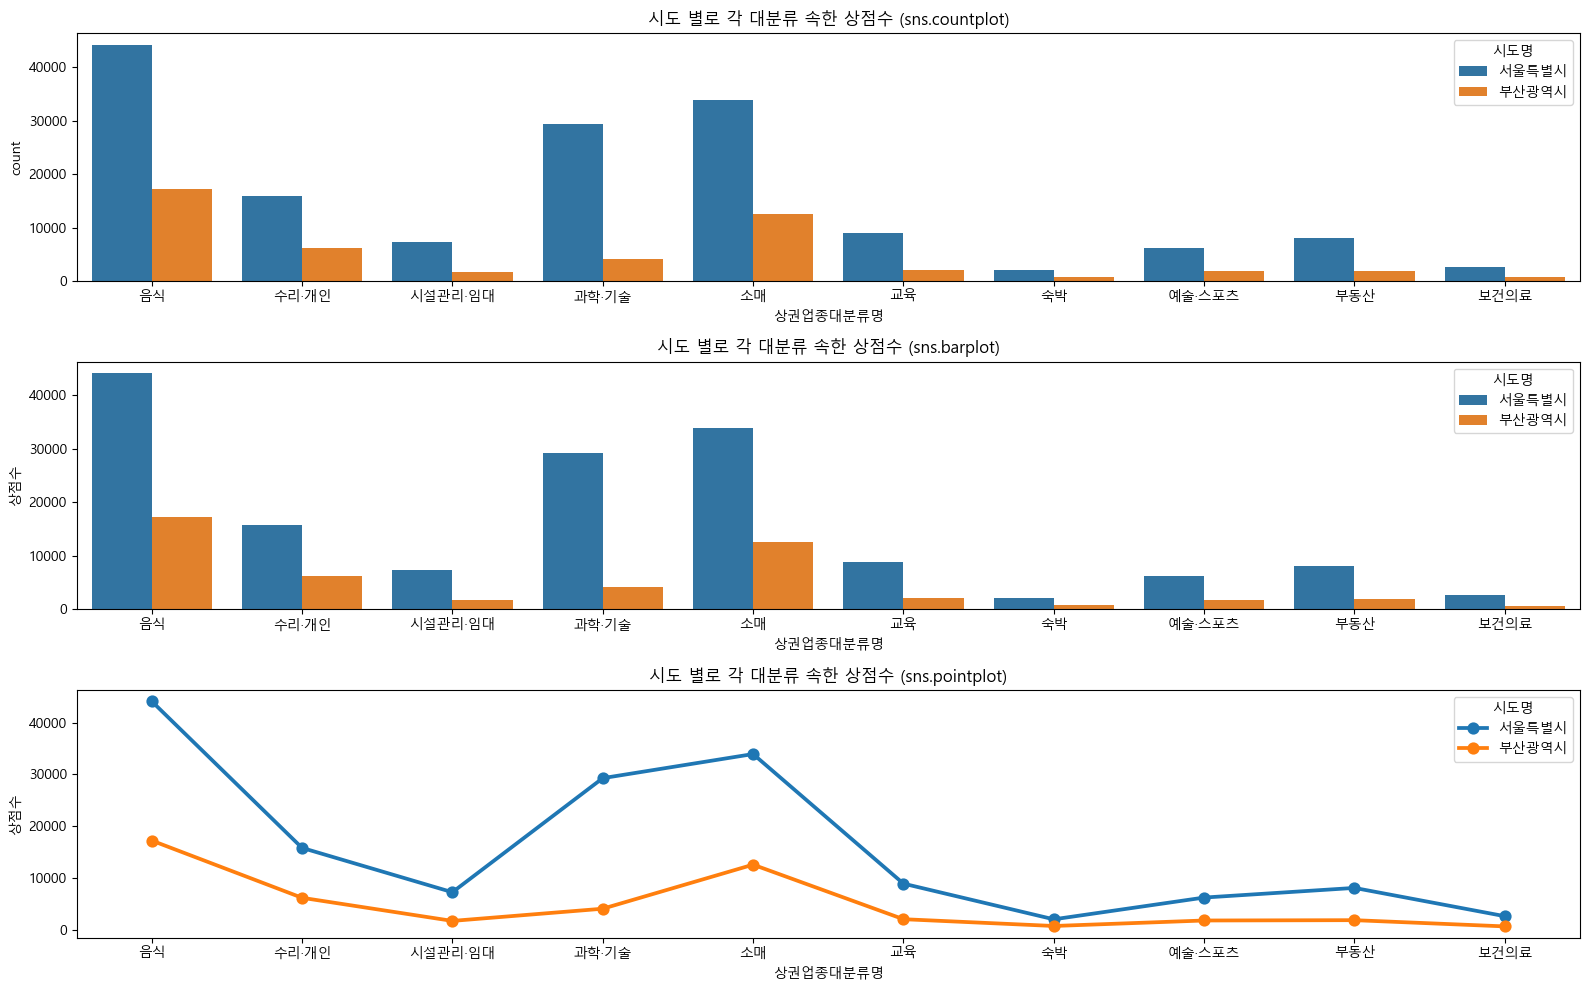

In [5]:
fig=plt.figure(figsize=(16,10),dpi=100)
axs=fig.subplots(3,1).flatten()

axs[0].set_title('시도 별로 각 대분류 속한 상점수 (sns.countplot)')
axs[1].set_title('시도 별로 각 대분류 속한 상점수 (sns.barplot)')
axs[2].set_title('시도 별로 각 대분류 속한 상점수 (sns.pointplot)')

x_tick_order=dfs['상권업종대분류명'].unique()

# ax0
_=sns.countplot(data=dfs, x='상권업종대분류명', hue='시도명', ax=axs[0], order=x_tick_order)

# ax1
sr1=dfs[['상권업종대분류명','시도명']].value_counts()
sr1.name='상점수'
df1=sr1.reset_index()
df1
_=sns.barplot(data=df1, x='상권업종대분류명', y='상점수', hue='시도명', ax=axs[1], order=x_tick_order)

# ax2
_=sns.pointplot(data=df1, x='상권업종대분류명', y='상점수', hue='시도명', ax=axs[2], order=x_tick_order)

fig.tight_layout()

# 실습2) 부산광역시의 시군구별로 각 대분류 속한 상점수 시각화
* ax1: barplot
* ax2: countplot

<Axes: title={'center': '부산광역시의 시군구별로 각 대분류 속한 상점수 시각화 (barplot)'}, xlabel='시군구명', ylabel='상점수'>

<Axes: title={'center': '부산광역시의 시군구별로 각 대분류 속한 상점수 시각화 (countplot'}, xlabel='시군구명', ylabel='count'>

Text(0, 0.5, '상점수')

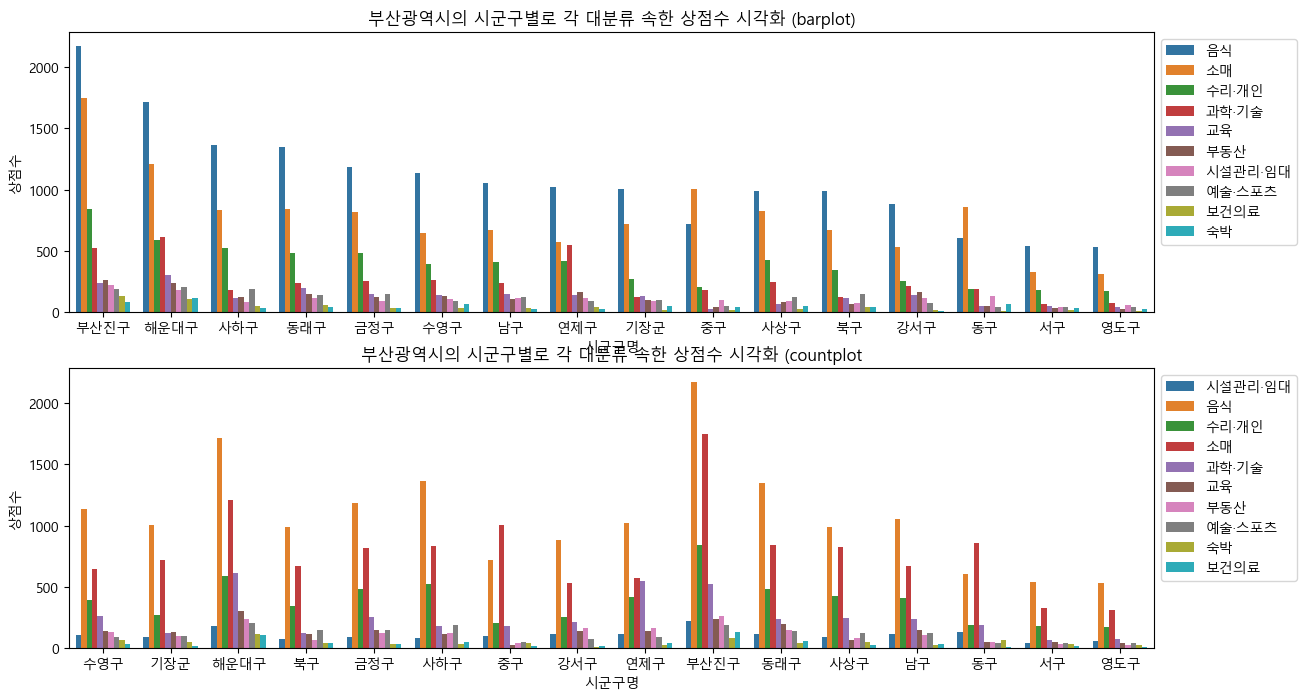

In [8]:
df_busan=dfs.loc[dfs['시도명']=='부산광역시']

fig=plt.figure(figsize=(14,8),dpi=100)
ax1, ax2=fig.subplots(2,1)

## ax1
_=ax1.set_title('부산광역시의 시군구별로 각 대분류 속한 상점수 시각화 (barplot)')
df1=df_busan[['시군구명','상권업종대분류명']].value_counts().reset_index()
df1=df1.rename(columns={'count':'상점수'})
sns.barplot(data=df1, x='시군구명', hue='상권업종대분류명', y='상점수', ax=ax1)
ax1.legend(bbox_to_anchor=(1,1),loc=2)

## ax2
_=ax2.set_title('부산광역시의 시군구별로 각 대분류 속한 상점수 시각화 (countplot')
sns.countplot(data=df_busan, x='시군구명', hue='상권업종대분류명', ax=ax2)
ax2.legend(bbox_to_anchor=(1,1),loc=2)
ax2.set_ylabel('상점수')

# 실습3) 부산광역시의 시군구별로 각 대분류 속한 상점수 시각화 (각 시군구를 하나의 axes에 plot)
* xtick은 x_tick_order 대로

16

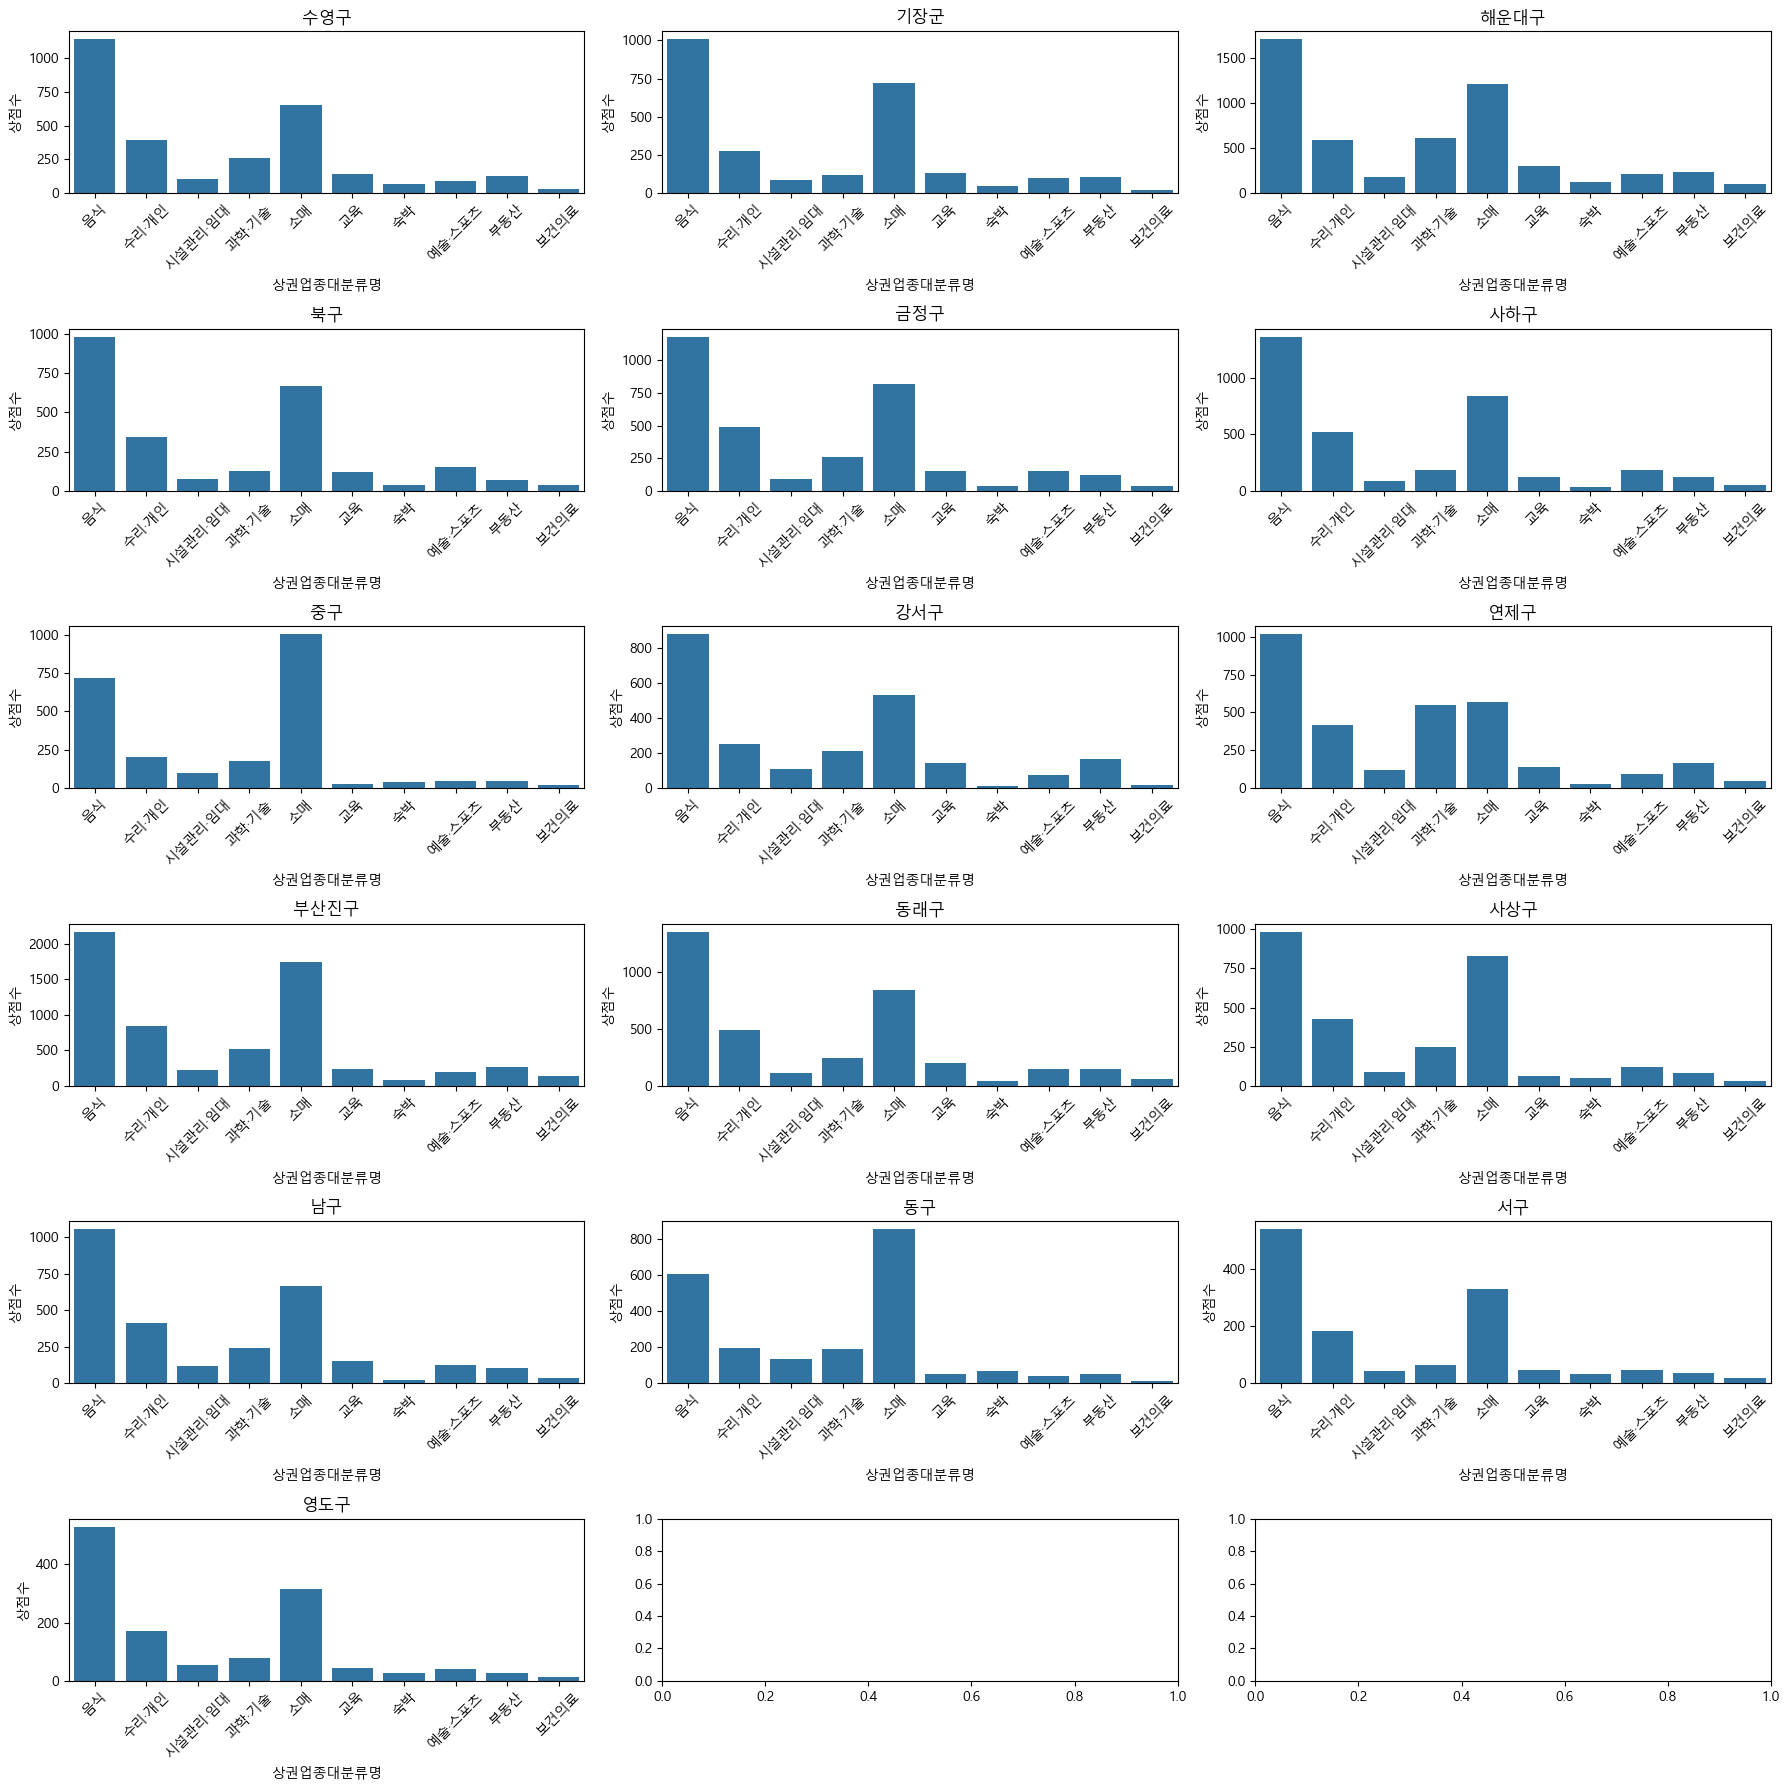

In [10]:
df_busan=dfs.loc[dfs['시도명']=='부산광역시'] # 서울특별시

x_tick_order=dfs['상권업종대분류명'].unique()
all_gu=df_busan['시군구명'].unique()
len(all_gu)

fig=plt.figure(figsize=(18,18),dpi=100)
axs=fig.subplots(6,3).flatten()


for ax1, gu, ii in zip(axs, all_gu, range(len(all_gu))):
    # 코드작성
    df_gu=df_busan.loc[df_busan['시군구명']==gu]
    _=sns.countplot(data=df_gu, x='상권업종대분류명', ax=ax1, order=x_tick_order)

    _=ax1.tick_params(axis='x', labelrotation=45)
    _=ax1.set_title(gu)
    _=ax1.set_ylabel('상점수')

fig.tight_layout()

# 실습4) 서울시의 상점중 대분류가 "교육" 인 상점만 선택후 아래와 같이 시각화 하기
* 시군구 별 상점 개수 (sns.barplot, 가나다 순으로)
* 소분류 별 상점 개수 (sns.countplot, 많은 순으로, top10만, 수평 bar)
* 시군구별 소분류별 상점 개수 (강남구, 강북구, 강서구, 강동구만) (sns barplot)
* 시군구별 소분류별 상점 개수  (강남구, 강북구, 강서구, 강동구만) (sns countplot)(x order, hue order axs[2]와 동일하게)

In [12]:
df_aca = dfs.loc[(dfs["시도명"] == "서울특별시") & (dfs["상권업종대분류명"] == "교육")].copy()
df_aca.shape

(8931, 18)

,시군구명,상권업종소분류명,count
0,강남구,입시·교과학원,378
1,강남구,요가/필라테스 학원,195
2,강남구,기타 교육지원 서비스업,189
3,강서구,입시·교과학원,133
4,강남구,교육컨설팅업,126
...,...,...,...
61,강남구,청소년 수련시설,1
62,강동구,전문자격/고시학원,1
63,강북구,청소년 수련시설,1
64,강북구,사회교육시설,1


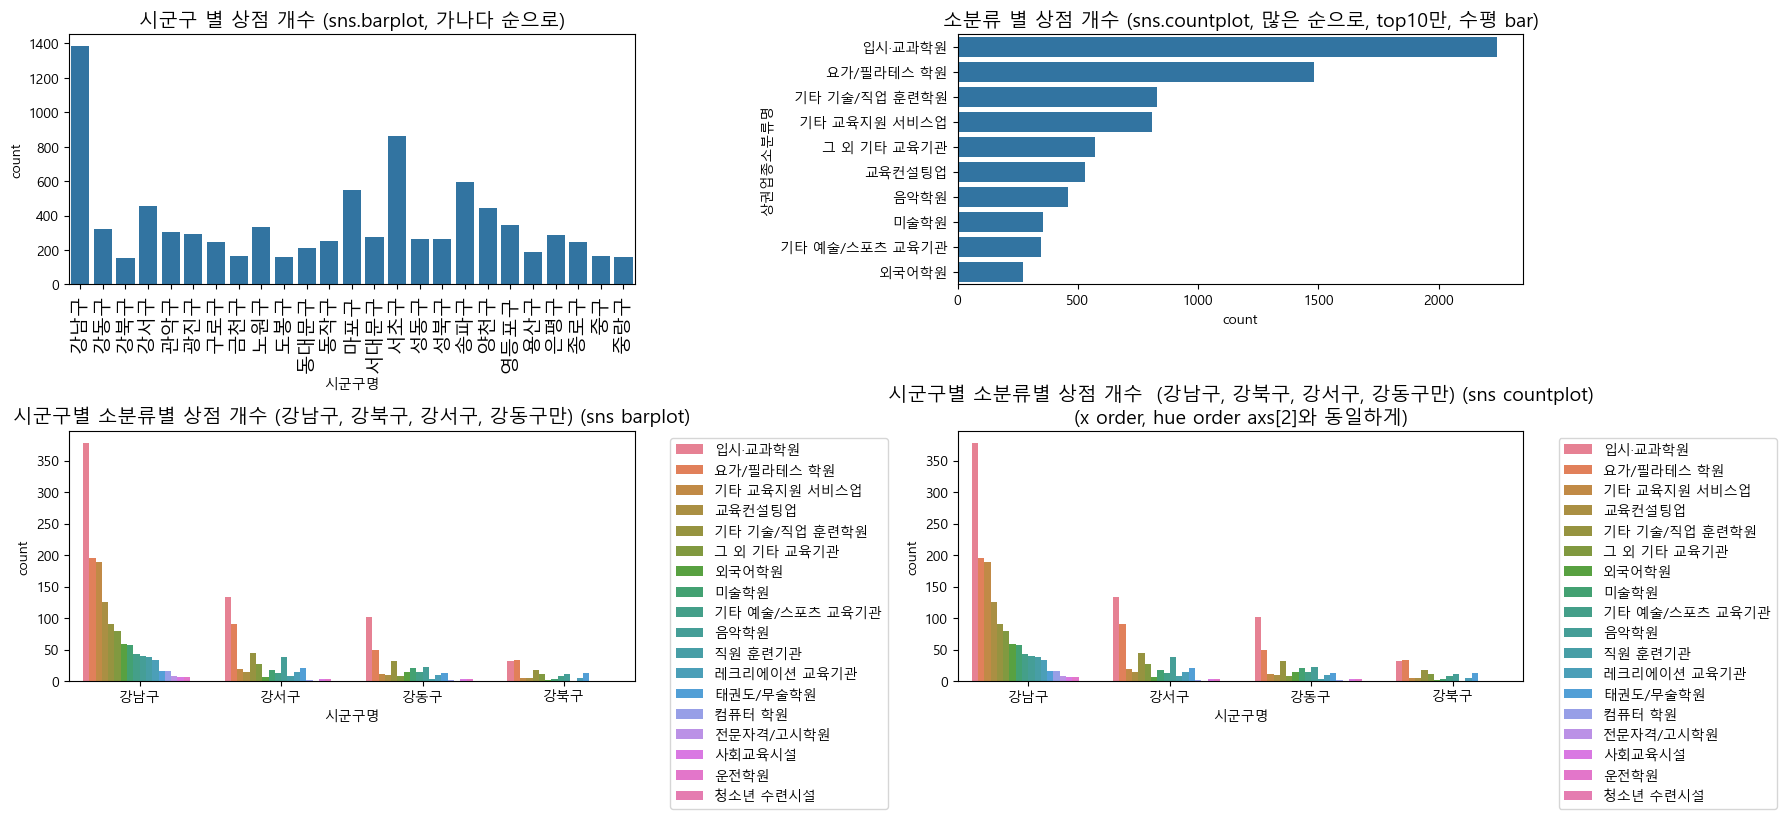

In [15]:
fig=plt.figure(figsize=(18,8),dpi=100)
axs=fig.subplots(2,2).flatten()

_=axs[0].set_title('시군구 별 상점 개수 (sns.barplot, 가나다 순으로)', fontsize=14)
# 코드작성
sr2=df_aca['시군구명'].value_counts().sort_index()
_=sns.barplot(sr2, ax=axs[0])
_=axs[0].tick_params(axis='x', rotation=90, labelsize=14)

_=axs[1].set_title('소분류 별 상점 개수 (sns.countplot, 많은 순으로, top10만, 수평 bar)', fontsize=14)
# 코드작성
ind_order=df_aca['상권업종소분류명'].value_counts().head(10).index
_=sns.countplot(data=df_aca, y='상권업종소분류명', order=ind_order, ax=axs[1])

## df_aca_4gu
df_aca_4gu=df_aca.loc[df_aca['시군구명'].isin(['강남구', '강북구', '강서구', '강동구'])]

_=axs[2].set_title('시군구별 소분류별 상점 개수 (강남구, 강북구, 강서구, 강동구만) (sns barplot)', fontsize=14)
# 코드작성
df2=df_aca_4gu[['시군구명','상권업종소분류명']].value_counts().reset_index()
df2
_=sns.barplot(data=df2, x='시군구명', y='count', hue='상권업종소분류명',ax=axs[2])
_=axs[2].legend(bbox_to_anchor=(1.05,1),loc=2)

_=axs[3].set_title('시군구별 소분류별 상점 개수  (강남구, 강북구, 강서구, 강동구만) (sns countplot)\n(x order, hue order axs[2]와 동일하게)', fontsize=14)
# 코드작성
handles, hue_labels = axs[2].get_legend_handles_labels()
xtick_labels = [tick.get_text() for tick in axs[2].get_xticklabels()]

_=sns.countplot(data=df_aca_4gu, x='시군구명',hue='상권업종소분류명',
                order=xtick_labels, hue_order=hue_labels,
                ax=axs[3])
_=axs[3].legend(bbox_to_anchor=(1.05,1),loc=2)

fig.tight_layout()

# 실습5) df_aca에서 시군구별로 가장많은 소분류와 그 개수 시각화 하기
* value_counts, drop_duplicates 사용

In [16]:
df_aca.head(1)

,상가업소번호,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
15,MA0101202309A0091330,에이치티교육,교육,교육 지원,기타 교육지원 서비스업,기타 교육지원 서비스업,서울특별시,관악구,서원동,신림동,대지,10.0,서울특별시 관악구 신림동 10-463,서울특별시 관악구 남부순환로194길,46.0,서울특별시 관악구 남부순환로194길 46,126.934823,37.482652


top소분류
강남구(입시·교과학원)          378
양천구(입시·교과학원)          202
서초구(입시·교과학원)          178
송파구(입시·교과학원)          154
노원구(입시·교과학원)          134
강서구(입시·교과학원)          133
강동구(입시·교과학원)          102
마포구(입시·교과학원)           97
은평구(입시·교과학원)           94
서대문구(입시·교과학원)          78
광진구(입시·교과학원)           76
성북구(입시·교과학원)           74
관악구(입시·교과학원)           70
동작구(입시·교과학원)           67
영등포구(요가/필라테스 학원)       67
구로구(입시·교과학원)           53
도봉구(입시·교과학원)           51
동대문구(입시·교과학원)          50
성동구(요가/필라테스 학원)        49
종로구(기타 기술/직업 훈련학원)     48
용산구(요가/필라테스 학원)        44
강북구(요가/필라테스 학원)        34
중랑구(요가/필라테스 학원)        31
중구(요가/필라테스 학원)         28
금천구(입시·교과학원)           25
Name: 상점수, dtype: int64

<Axes: xlabel='상점수', ylabel='top소분류'>

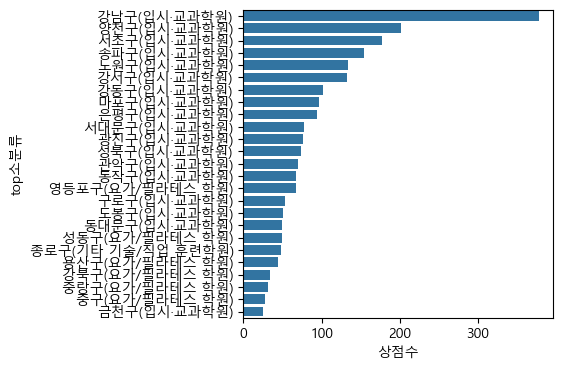

In [17]:
fig=plt.figure(figsize=(4,4),dpi=100)
ax1=fig.subplots()

df5=df_aca[['시군구명','상권업종소분류명']]
aca_cnt=df5.value_counts().reset_index().drop_duplicates(subset='시군구명')

aca_cnt['ind']=aca_cnt['시군구명']+'('+aca_cnt['상권업종소분류명'] + ')'
aca_cnt=aca_cnt.drop(columns=['시군구명','상권업종소분류명']).rename(columns={'count':'상점수', 'ind':'top소분류'})
aca_cnt=aca_cnt.set_index('top소분류')['상점수']
aca_cnt

sns.barplot(aca_cnt, orient='h', ax=ax1)

# 경도 위도 scatterplot 하기

In [18]:
dfs.head(1)

,상가업소번호,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,MA0106202307A0467187,츠키요와,음식,일식,일식 회/초밥,일식 음식점업,서울특별시,강남구,청담동,청담동,대지,83.0,서울특별시 강남구 청담동 83-17,서울특별시 강남구 선릉로158길,13.0,서울특별시 강남구 선릉로158길 13-12,127.041457,37.526122


<Axes: xlabel='경도', ylabel='위도'>

<Axes: xlabel='경도', ylabel='위도'>

<Axes: xlabel='경도', ylabel='위도'>

<Axes: xlabel='경도', ylabel='위도'>

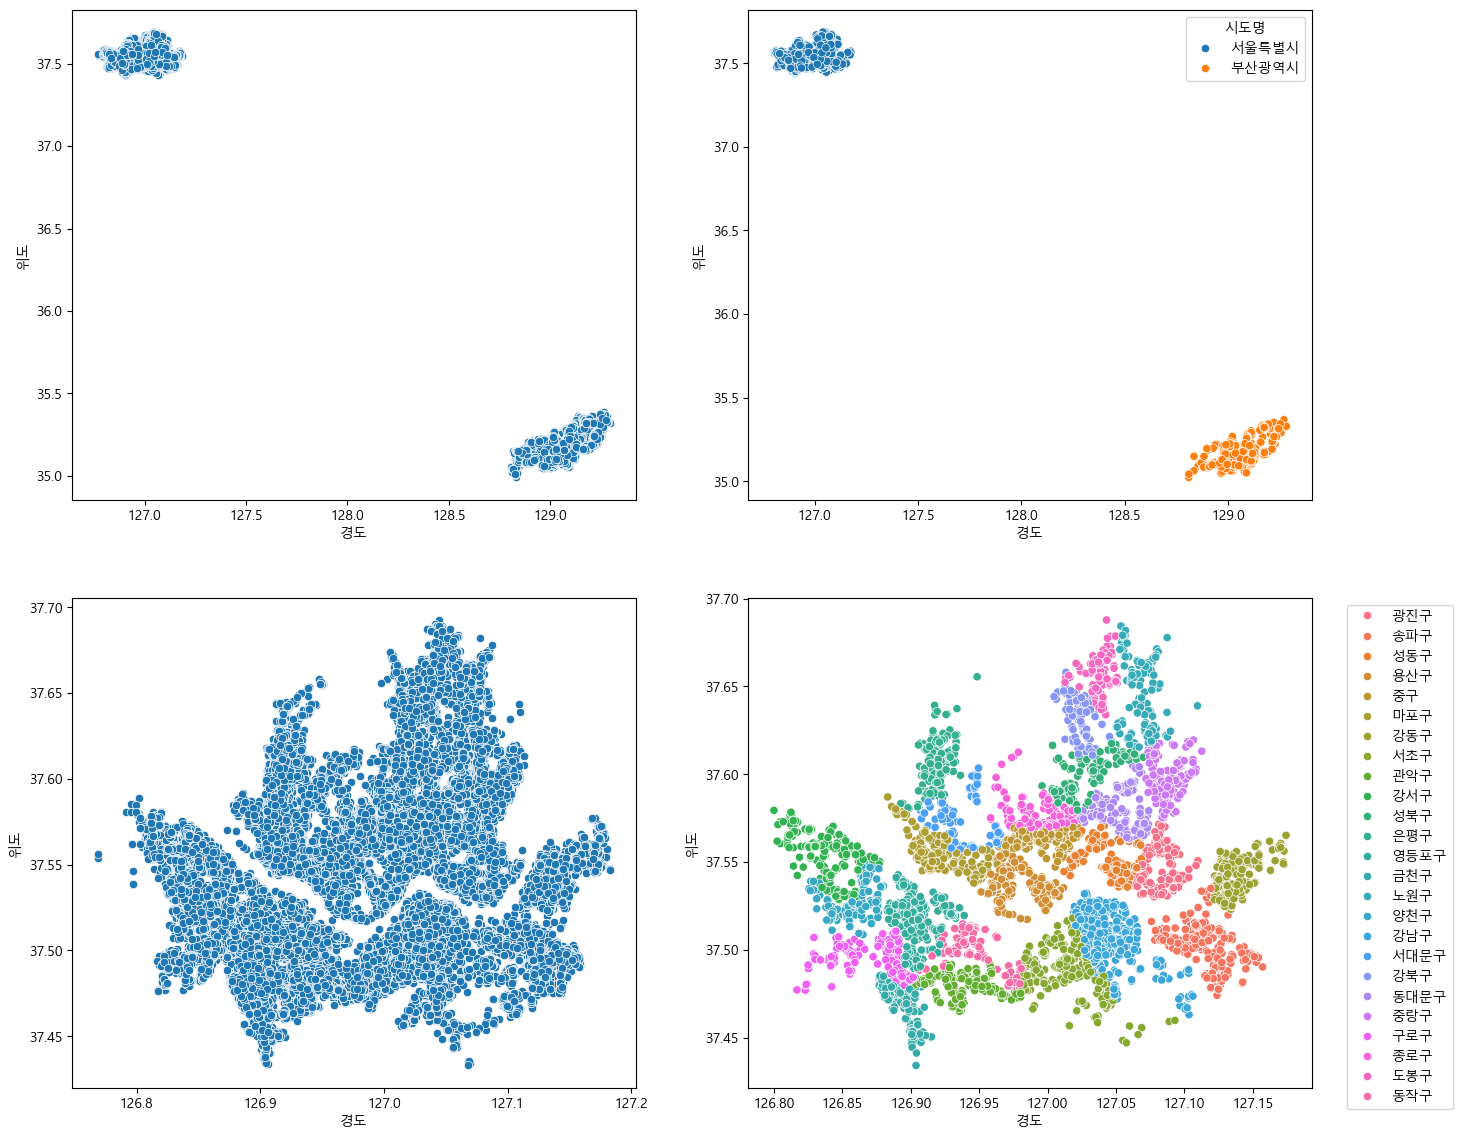

In [19]:
fig=plt.figure(figsize=(16,14),dpi=100)
axs=fig.subplots(2,2).flatten()

# scatterplot 으로 경도와 위도를 표현
sns.scatterplot(data=dfs, x="경도", y="위도", ax=axs[0])
# scatterplot 으로 경도와 위도를 표현, 시도별로 색깔 다르게
sns.scatterplot(data=dfs.sample(5000), x="경도", y="위도", hue='시도명', ax=axs[1])

df_seoul=dfs.loc[dfs['시도명']=='서울특별시']
# scatterplot 으로 서울시의 경도와 위도를 표현
sns.scatterplot(data=df_seoul, x="경도", y="위도", ax=axs[2])
# scatterplot 으로 서울시의 경도와 위도를 표현, 시군구별로 색깔 다르게
sns.scatterplot(data=df_seoul.sample(5000), x="경도", y="위도", hue='시군구명', ax=axs[3])
_=axs[3].legend(bbox_to_anchor=(1.05,1),loc=2)

# 실습6) "입시·교과학원",'요가/필라테스 학원' 경도 위도 scatterplot 하기

In [20]:
# 가운데점 (아래하) 입력 방법: '한글ㄱ' + '한자' + 'Tab 한번' + '오른쪽방향키' + '숫자 8'

<Axes: xlabel='경도', ylabel='위도'>

<Axes: xlabel='경도', ylabel='위도'>

<Axes: xlabel='count', ylabel='시군구명'>

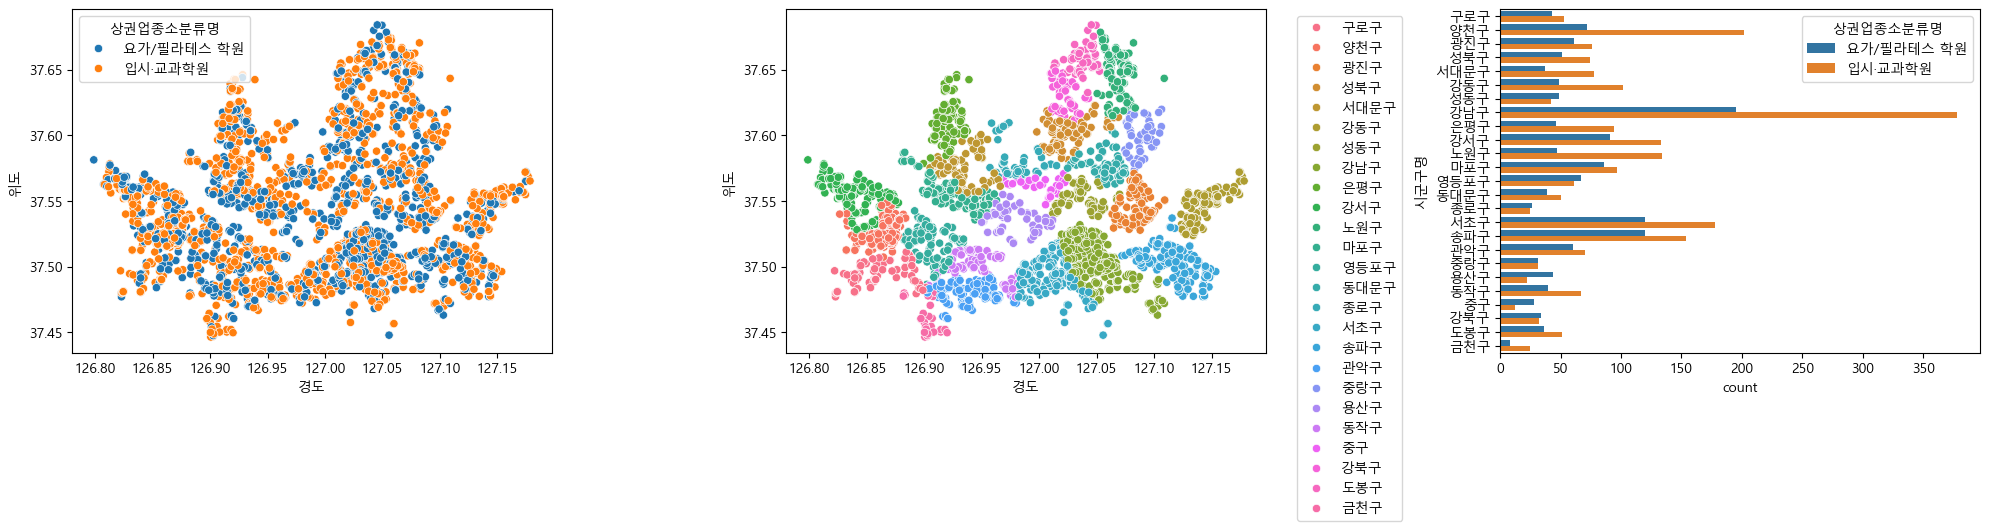

In [21]:
fig=plt.figure(figsize=(20, 5), dpi=100)
axs=fig.subplots(1,3).flatten()

df_aca = dfs.loc[(dfs["시도명"] == "서울특별시") & (dfs["상권업종대분류명"] == "교육")].copy()
# 소분류명에서 "입시·교과학원",'요가/필라테스 학원'만 선택
df_aca_sub=df_aca.loc[df_aca["상권업종소분류명"].isin(["입시·교과학원",'요가/필라테스 학원'])]

# axs[0]: 소분류명 별로 색깔 다르게
sns.scatterplot(data=df_aca_sub,x="경도", y="위도", hue="상권업종소분류명", ax=axs[0])

# axs[1]: 시군구명 별로 색깔 다르게
sns.scatterplot(data=df_aca_sub,x="경도", y="위도", hue="시군구명", ax=axs[1])
axs[1].legend(bbox_to_anchor=(1.05,1),loc=2)

# axs[2]: 시군구별, 소분류명별 상점수
sns.countplot(data=df_aca_sub, y='시군구명',hue='상권업종소분류명', ax=axs[2])

fig.tight_layout(h_pad=3)

# Folium 으로 지도 활용하기
anaconda prompt 창에 아래 명령어를 통해 folium 을 설치합니다.

* pip install folium

또는 ipynb cell에서 

* %pip install folium

In [27]:
%pip install folium

Note: you may need to restart the kernel to use updated packages.


In [3]:
import folium 
print('folium', folium.__version__)

folium 0.16.0


In [7]:
# 위에서 그렸던 "입시·교과학원","요가/필라테스 학원" 데이터를 지도에 시각화 해봅니다.
df_aca = dfs.loc[(dfs["시도명"] == "서울특별시") & (dfs["상권업종대분류명"] == "교육")].copy()
df_aca_sub=df_aca.loc[df_aca["상권업종소분류명"].isin(["입시·교과학원",'요가/필라테스 학원'])]
df_m = df_aca_sub.head(1000)
df_aca_sub.shape
df_m.shape
df_m.head(3)

(3721, 18)

(1000, 18)

,상가업소번호,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
191,MA010120220813257907,어반필드필라테스,교육,기타 교육,요가/필라테스 학원,기타 스포츠 교육기관,서울특별시,구로구,신도림동,신도림동,대지,337.0,서울특별시 구로구 신도림동 337,서울특별시 구로구 경인로,661.0,서울특별시 구로구 경인로 661,126.886966,37.509035
203,MA0101202306A0065654,유노점프줄넘기클럽,교육,기타 교육,요가/필라테스 학원,기타 스포츠 교육기관,서울특별시,양천구,목5동,목동,대지,905.0,서울특별시 양천구 목동 905-22,서울특별시 양천구 목동동로,339.0,서울특별시 양천구 목동동로 339,126.876801,37.532176
234,MA010120220812746879,루나비츠,교육,기타 교육,요가/필라테스 학원,기타 스포츠 교육기관,서울특별시,광진구,자양3동,자양동,대지,583.0,서울특별시 광진구 자양동 583-15,서울특별시 광진구 자양번영로3길,12.0,서울특별시 광진구 자양번영로3길 12,127.074581,37.531784


## map 생성

In [8]:
lat = df_m["위도"].mean()
long = df_m["경도"].mean()

m = folium.Map(location=[lat, long], zoom_start=13)
m.save("map1.html")
m

In [9]:
m = folium.Map(location=[lat, long], zoom_start=12, tiles='Cartodb Positron')
m

## marker 생성

In [15]:
df_m.head(1)
lat = df_m["위도"].mean()
long = df_m["경도"].mean()

m = folium.Map(location=[lat, long], zoom_start=12)
folium.Marker([37.55, 126.9], tooltip="AAAAA").add_to(m)
folium.Marker([df_m.iloc[0]['위도'], df_m.iloc[0]['경도']], tooltip=df_m.iloc[0]['상호명']).add_to(m)
m

,상가업소번호,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
191,MA010120220813257907,어반필드필라테스,교육,기타 교육,요가/필라테스 학원,기타 스포츠 교육기관,서울특별시,구로구,신도림동,신도림동,대지,337.0,서울특별시 구로구 신도림동 337,서울특별시 구로구 경인로,661.0,서울특별시 구로구 경인로 661,126.886966,37.509035


## for loop을 활용한 marker 생성 (circle & marker)

In [17]:
df_m.head(1)
df_m.index[:10]
for i in df_m.index[:10]:
    tooltip = df_m.loc[i, "상호명"] +"("+ df_m.loc[i, "도로명주소"]+")"
    lat = df_m.loc[i, "위도"]
    long = df_m.loc[i, "경도"]
    tooltip, lat, long

,상가업소번호,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
191,MA010120220813257907,어반필드필라테스,교육,기타 교육,요가/필라테스 학원,기타 스포츠 교육기관,서울특별시,구로구,신도림동,신도림동,대지,337.0,서울특별시 구로구 신도림동 337,서울특별시 구로구 경인로,661.0,서울특별시 구로구 경인로 661,126.886966,37.509035


Index([191, 203, 234, 255, 268, 273, 303, 395, 423, 452], dtype='int64')

('어반필드필라테스(서울특별시 구로구 경인로 661)', 37.5090348833153, 126.886965798897)

('유노점프줄넘기클럽(서울특별시 양천구 목동동로 339)', 37.5321764964234, 126.876801162566)

('루나비츠(서울특별시 광진구 자양번영로3길 12)', 37.5317835491996, 127.074581465178)

('이너라인필라테스(서울특별시 성북구 장월로1길 57)', 37.6059760541232, 127.045201760169)

('플라토어학원(서울특별시 서대문구 가좌로 110)', 37.5824732147869, 126.926281293541)

('밸런스기구필라테스(서울특별시 성북구 숭인로 50)', 37.6119780382942, 127.028769529178)

('리클래식필라테스(서울특별시 강동구 동남로82길 111)', 37.560431098261, 127.163136273655)

('요가/필라테스 학원(서울특별시 강동구 성안로13길 27-13)', 37.5310737073866, 127.130573535626)

('PKSPORTAMENTPT필라테스(서울특별시 성동구 독서당로62길 43)',
 37.5518903627794,
 127.033510915987)

('날리지에이드(서울특별시 강남구 도산대로1길 77)', 37.521751321786, 127.019430684355)

In [18]:
lat = df_m.head(20)["위도"].mean()
long = df_m.head(20)["경도"].mean()
m = folium.Map(location=[lat, long], zoom_start=12)

for i in df_m.index[:5]:
    t1 = df_m.loc[i, "상호명"] +"("+ df_m.loc[i, "도로명주소"]+")"
    lat = df_m.loc[i, "위도"]
    long = df_m.loc[i, "경도"]
    
    _=folium.Marker([lat, long], tooltip=t1, radius=3).add_to(m)

for i in df_m.index[5:10]:
    t1 = df_m.loc[i, "상호명"] +"("+ df_m.loc[i, "도로명주소"]+")"
    lat = df_m.loc[i, "위도"]
    long = df_m.loc[i, "경도"]
    
    _=folium.Marker([lat, long], popup=t1, radius=3, icon=folium.Icon(color="green")).add_to(m)

for i in df_m.index[10:15]:
    t1 = df_m.loc[i, "상호명"] +"("+ df_m.loc[i, "도로명주소"]+")"
    lat = df_m.loc[i, "위도"]
    long = df_m.loc[i, "경도"]
    
    _=folium.Circle([lat, long], tooltip=t1, radius=500, color='crimson', fill=True).add_to(m)

for i in df_m.index[15:20]:
    t1 = df_m.loc[i, "상호명"] +"("+ df_m.loc[i, "도로명주소"]+")"
    lat = df_m.loc[i, "위도"]
    long = df_m.loc[i, "경도"]
    
    _=folium.Circle([lat, long], popup=t1, radius=400, color='black', fill=False).add_to(m)
    
m
m.save("map2.html")

## 도봉구와 성동구의 요가/필라테스 학원, 입시·교과학원 나누어서 표시

In [19]:
# 성동구는 어린이집이 도봉구는 학원-입시가 더 많이 있음
df_m2 = df_m.loc[df_m["시군구명"].isin(["도봉구","성동구"])]
df_m2[['시군구명','상권업종소분류명']].value_counts()

시군구명  상권업종소분류명  
성동구   요가/필라테스 학원    20
      입시·교과학원       17
도봉구   입시·교과학원        9
      요가/필라테스 학원     7
Name: count, dtype: int64

In [22]:
lat = df_m2["위도"].mean()
long = df_m2["경도"].mean()
m = folium.Map(location=[lat, long], zoom_start=11)

df_m2_ex=df_m2.loc[df_m2['상권업종소분류명']=='입시·교과학원']
for i in df_m2_ex.index:
    t1 = df_m2.loc[i, "상호명"] +"("+ df_m2.loc[i, "도로명주소"]+")"
    lat = df_m2.loc[i, "위도"]
    long = df_m2.loc[i, "경도"]
    
    _=folium.Marker([lat, long], tooltip=t1, radius=2, icon=folium.Icon(color="green")).add_to(m)
    
df_m2_ch=df_m2.loc[df_m2['상권업종소분류명']=='요가/필라테스 학원']
for i in df_m2_ch.index:
    t1 = df_m2.loc[i, "상호명"] +"("+ df_m2.loc[i, "도로명주소"]+")"
    lat = df_m2.loc[i, "위도"]
    long = df_m2.loc[i, "경도"]
    
    _=folium.Marker([lat, long], tooltip=t1, radius=2, icon=folium.Icon(color="red")).add_to(m)

m

# ===실습풀이

## 실습1) 시도 별로 각 대분류 속한 상점수 시각화
* x tick의 순서는 x_tick_order 로 하기

Text(0.5, 1.0, '시도 별로 각 대분류 속한 상점수 (sns.countplot)')

Text(0.5, 1.0, '시도 별로 각 대분류 속한 상점수 (sns.barplot)')

Text(0.5, 1.0, '시도 별로 각 대분류 속한 상점수 (sns.pointplot)')

,상권업종대분류명,시도명,상점수
0,음식,서울특별시,44114
1,소매,서울특별시,33929
2,과학·기술,서울특별시,29281
3,음식,부산광역시,17246
4,수리·개인,서울특별시,15828
5,소매,부산광역시,12592
6,교육,서울특별시,8931
7,부동산,서울특별시,8107
8,시설관리·임대,서울특별시,7275
9,예술·스포츠,서울특별시,6247


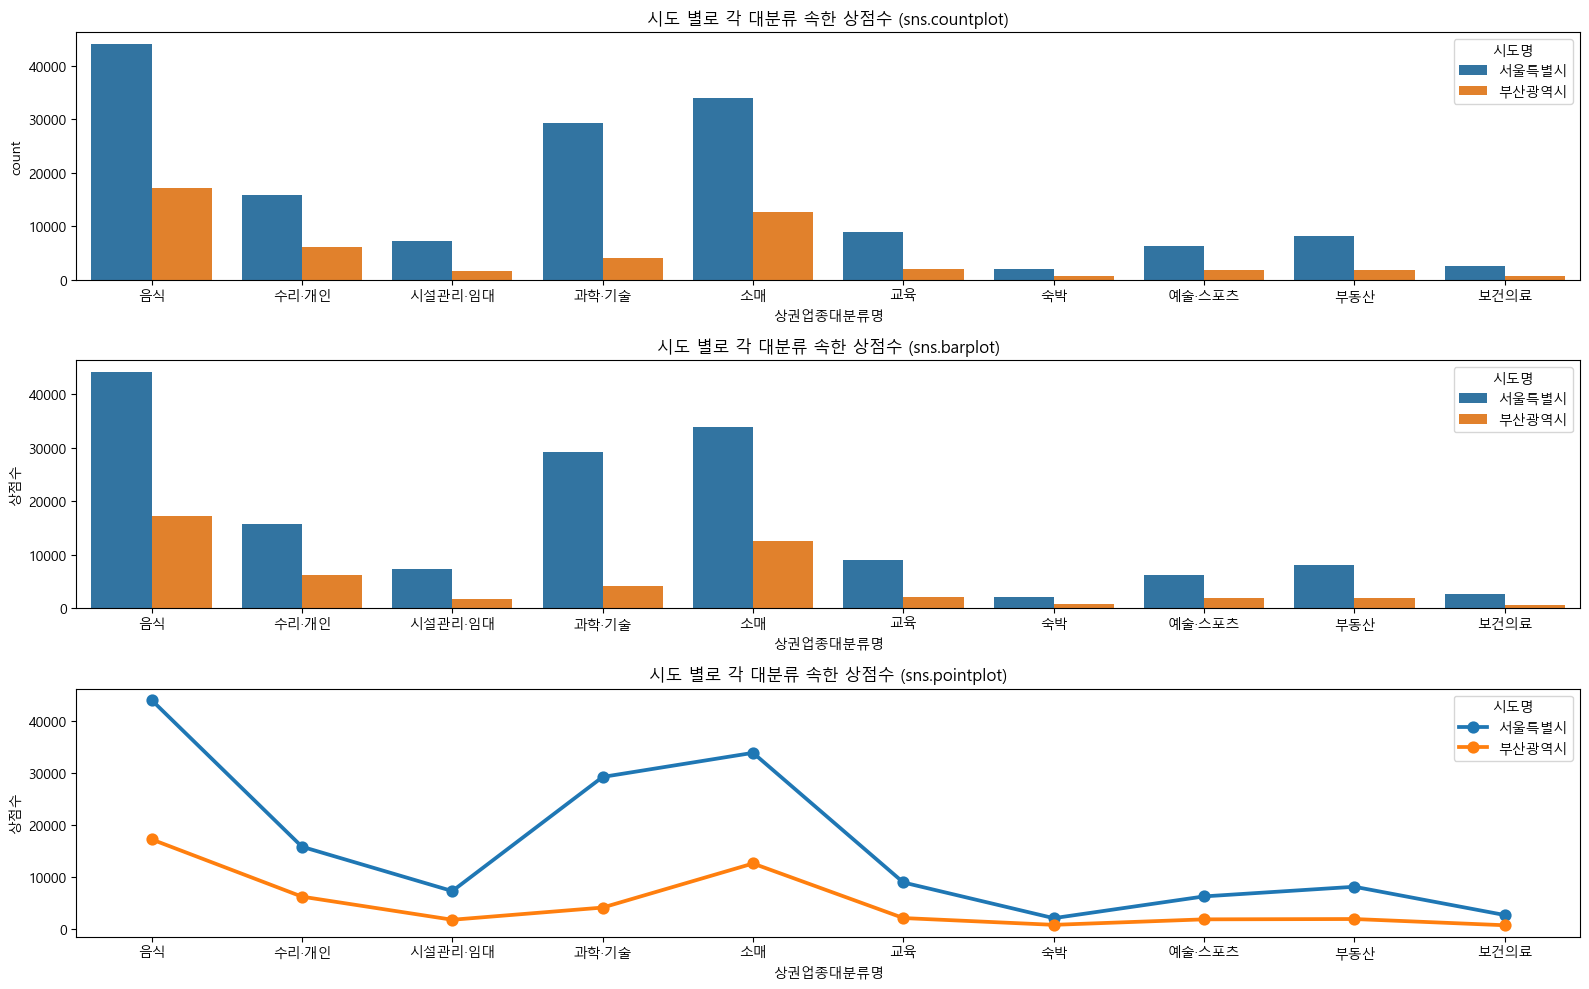

In [11]:
fig=plt.figure(figsize=(16,10),dpi=100)
axs=fig.subplots(3,1).flatten()

axs[0].set_title('시도 별로 각 대분류 속한 상점수 (sns.countplot)')
axs[1].set_title('시도 별로 각 대분류 속한 상점수 (sns.barplot)')
axs[2].set_title('시도 별로 각 대분류 속한 상점수 (sns.pointplot)')

x_tick_order=dfs['상권업종대분류명'].unique()

# ax0
_=sns.countplot(data=dfs, x='상권업종대분류명', hue='시도명', ax=axs[0], order=x_tick_order)

# ax1
sr1=dfs[['상권업종대분류명','시도명']].value_counts()
sr1.name='상점수'
df1=sr1.reset_index()
df1
_=sns.barplot(data=df1, x='상권업종대분류명', y='상점수', hue='시도명', ax=axs[1], order=x_tick_order)

# ax2
_=sns.pointplot(data=df1, x='상권업종대분류명', y='상점수', hue='시도명', ax=axs[2], order=x_tick_order)

fig.tight_layout()

## 실습2) 부산광역시의 시군구별로 각 대분류 속한 상점수 시각화
* ax1: barplot
* ax2: countplot

<Axes: xlabel='시군구명', ylabel='상점수'>

<Axes: xlabel='시군구명', ylabel='count'>

Text(0, 0.5, '상점수')

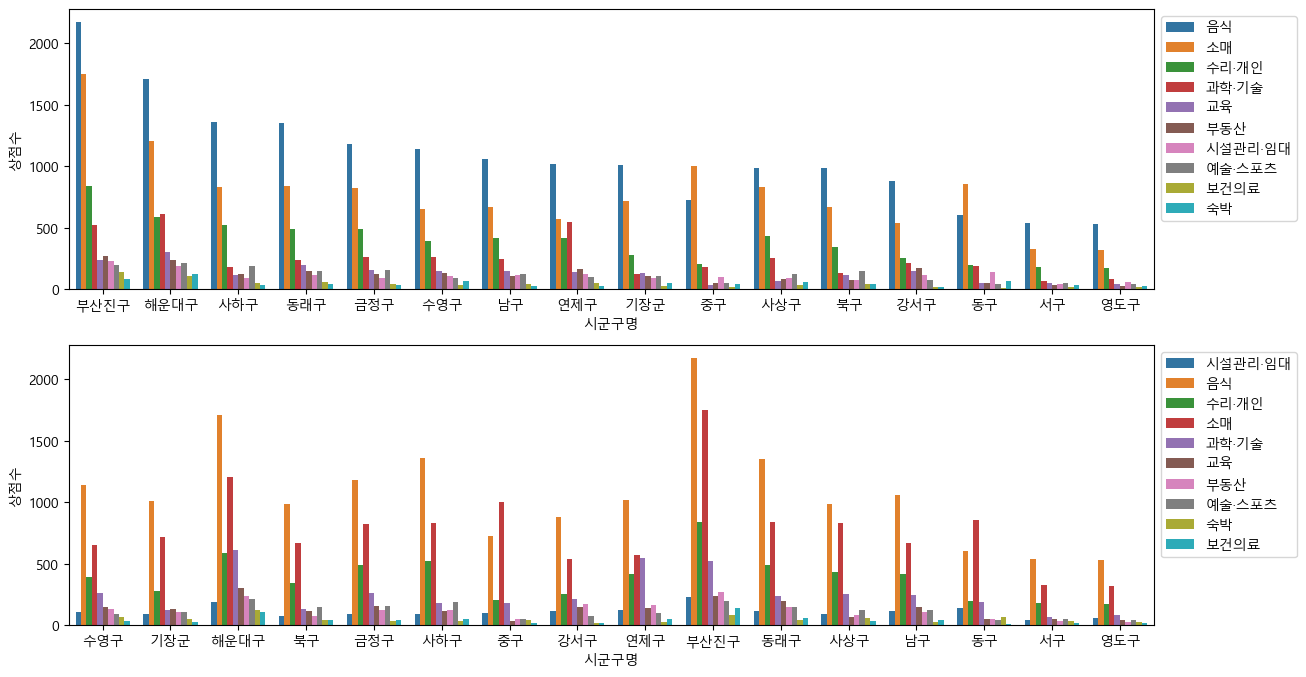

In [22]:
df_busan=dfs.loc[dfs['시도명']=='부산광역시']

fig=plt.figure(figsize=(14,8),dpi=100)
ax1, ax2=fig.subplots(2,1)

## ax1
_=ax.set_title('부산광역시의 시군구별로 각 대분류 속한 상점수 시각화 (barplot)')
df1=df_busan[['시군구명','상권업종대분류명']].value_counts().reset_index()
df1=df1.rename(columns={'count':'상점수'})
sns.barplot(data=df1, x='시군구명', hue='상권업종대분류명', y='상점수', ax=ax1)
ax1.legend(bbox_to_anchor=(1,1),loc=2)

## ax2
_=ax.set_title('부산광역시의 시군구별로 각 대분류 속한 상점수 시각화 (countplot')
sns.countplot(data=df_busan, x='시군구명', hue='상권업종대분류명', ax=ax2)
ax2.legend(bbox_to_anchor=(1,1),loc=2)
ax2.set_ylabel('상점수')

## 실습3) 부산광역시의 시군구별로 각 대분류 속한 상점수 시각화 (각 시군구를 하나의 axes에 plot)

16

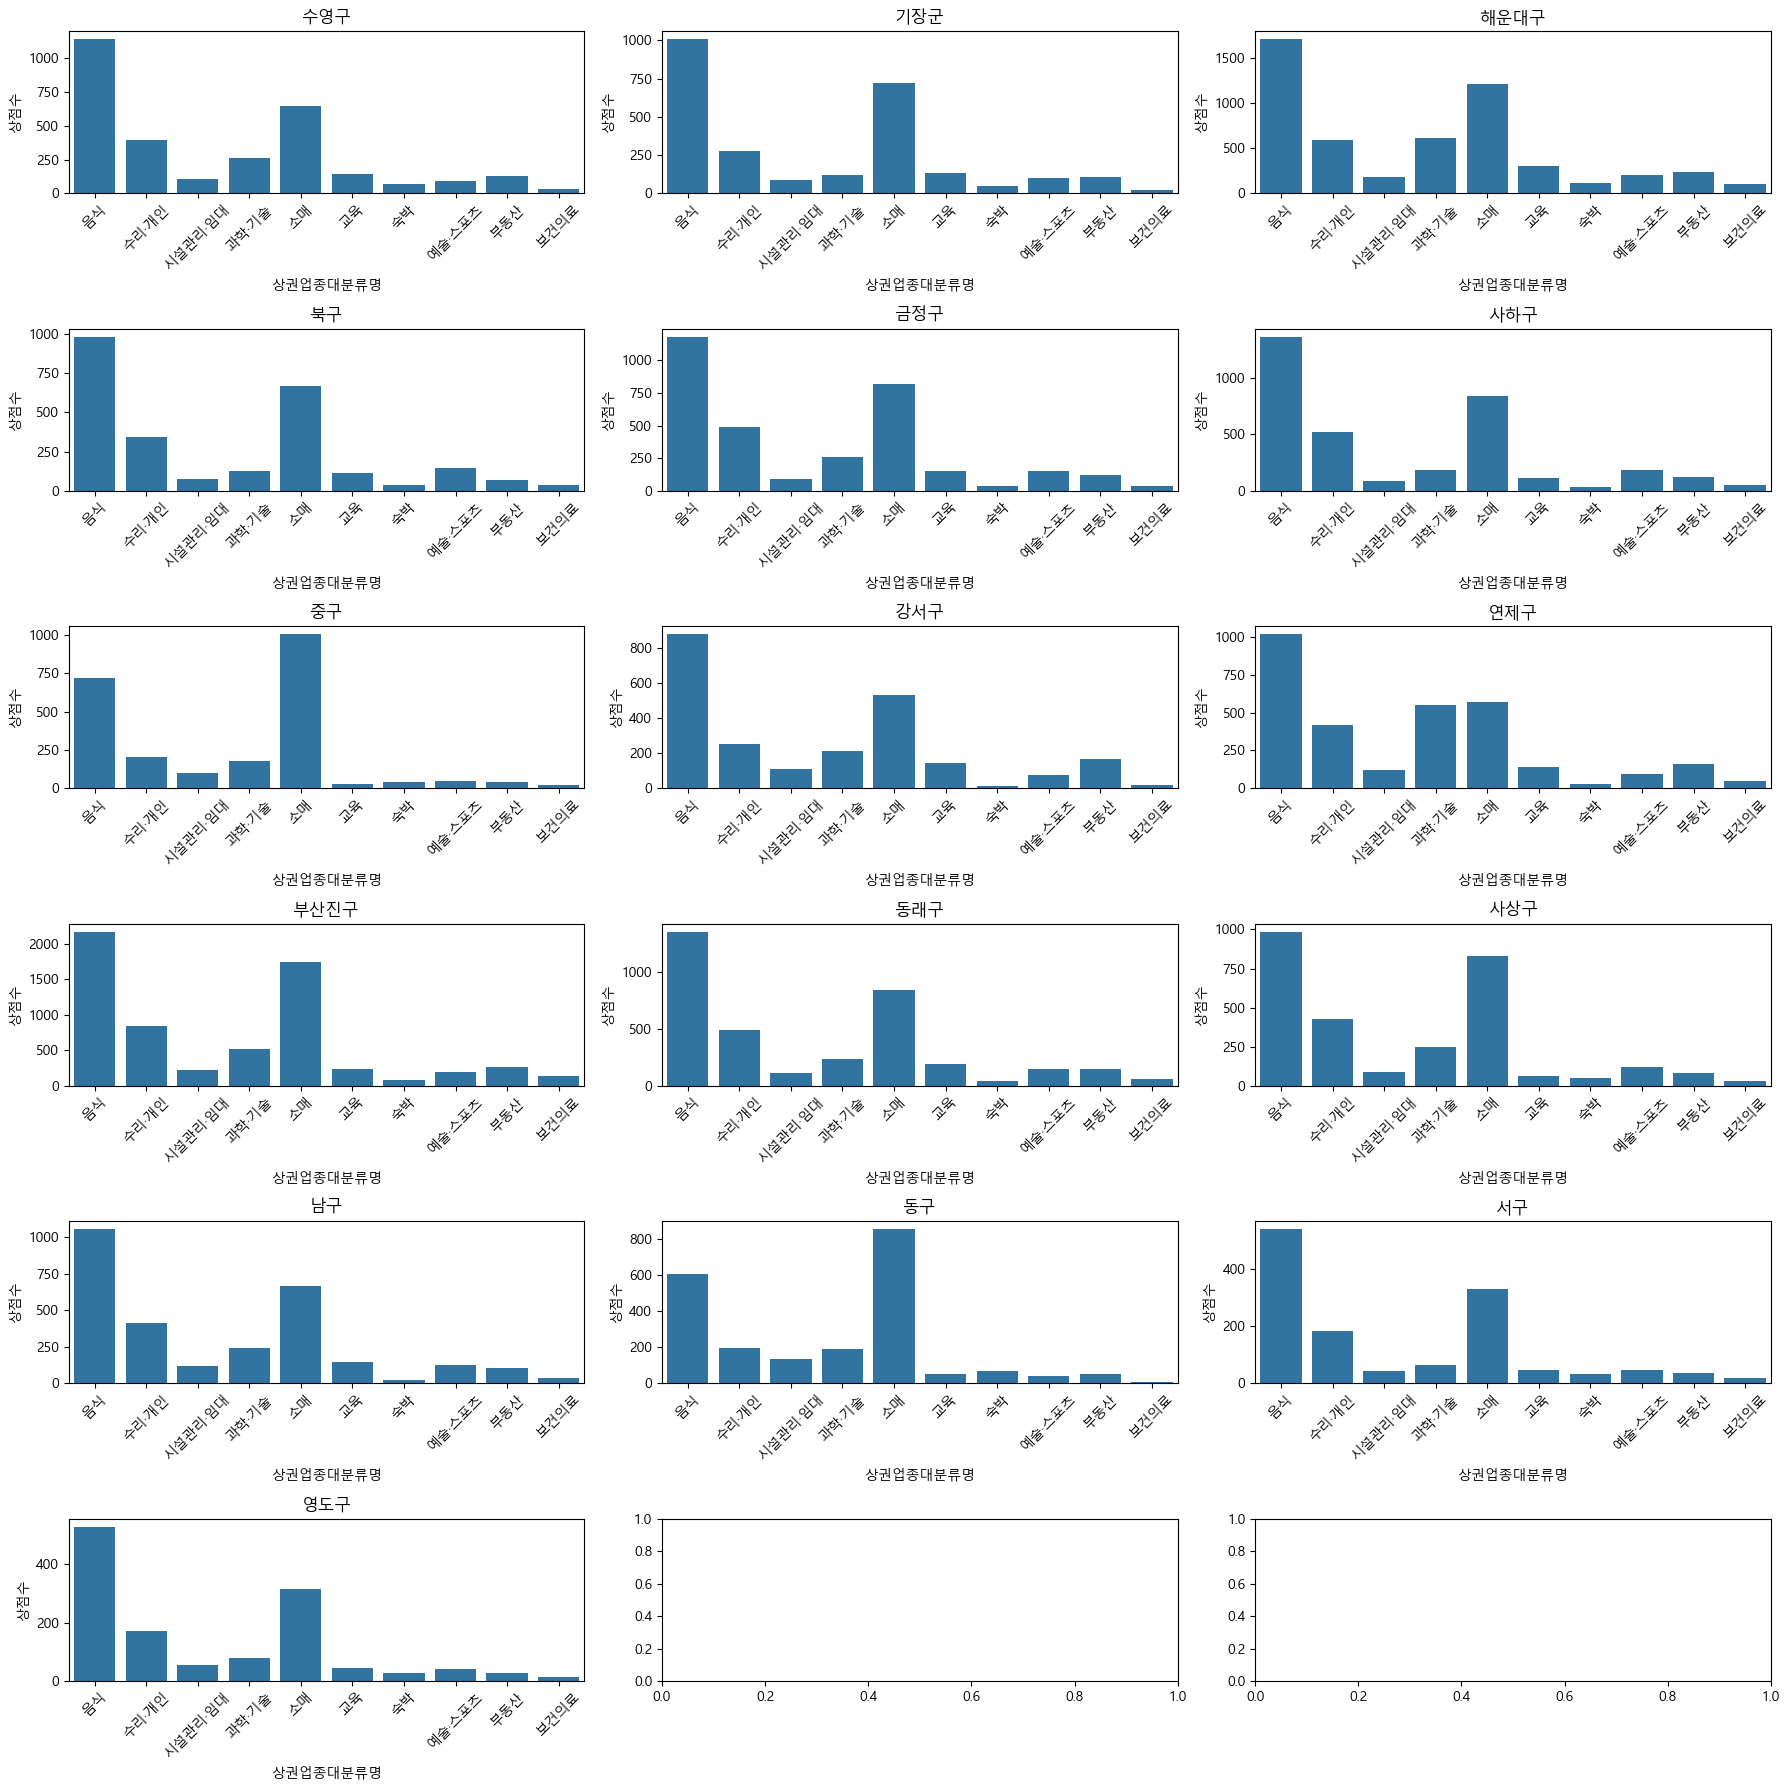

In [21]:
df_busan=dfs.loc[dfs['시도명']=='부산광역시'] # 서울특별시

x_tick_order=dfs['상권업종대분류명'].unique()
all_gu=df_busan['시군구명'].unique()
len(all_gu)

fig=plt.figure(figsize=(18,18),dpi=100)
axs=fig.subplots(6,3).flatten()


for ax1, gu, ii in zip(axs, all_gu, range(len(all_gu))):
    df_gu=df_busan.loc[df_busan['시군구명']==gu]
    _=sns.countplot(data=df_gu, x='상권업종대분류명', ax=ax1, order=x_tick_order)
    
    _=ax1.tick_params(axis='x', labelrotation=45)
    _=ax1.set_title(gu)
    _=ax1.set_ylabel('상점수')

fig.tight_layout()

## 실습4) 서울시의 상점중 대분류가 "교육" 인 상점만 선택후 아래와 같이 시각화 하기
* 시군구 별 상점 개수 (sns.barplot, 가나다 순으로)
* 소분류 별 상점 개수 (sns.countplot, 많은 순으로, top10만, 수평 bar)
* 시군구별 소분류별 상점 개수 (강남구, 강북구, 강서구, 강동구만) (sns barplot)
* 시군구별 소분류별 상점 개수  (강남구, 강북구, 강서구, 강동구만) (sns countplot)(x order, hue order axs[2]와 동일하게)

In [47]:
df_aca = dfs.loc[(dfs["시도명"] == "서울특별시") & (dfs["상권업종대분류명"] == "교육")].copy()
df_aca.shape

(8931, 18)

,시군구명,상권업종소분류명,count
0,강남구,입시·교과학원,378
1,강남구,요가/필라테스 학원,195
2,강남구,기타 교육지원 서비스업,189
3,강서구,입시·교과학원,133
4,강남구,교육컨설팅업,126
...,...,...,...
61,강남구,청소년 수련시설,1
62,강북구,청소년 수련시설,1
63,강북구,직원 훈련기관,1
64,강북구,사회교육시설,1


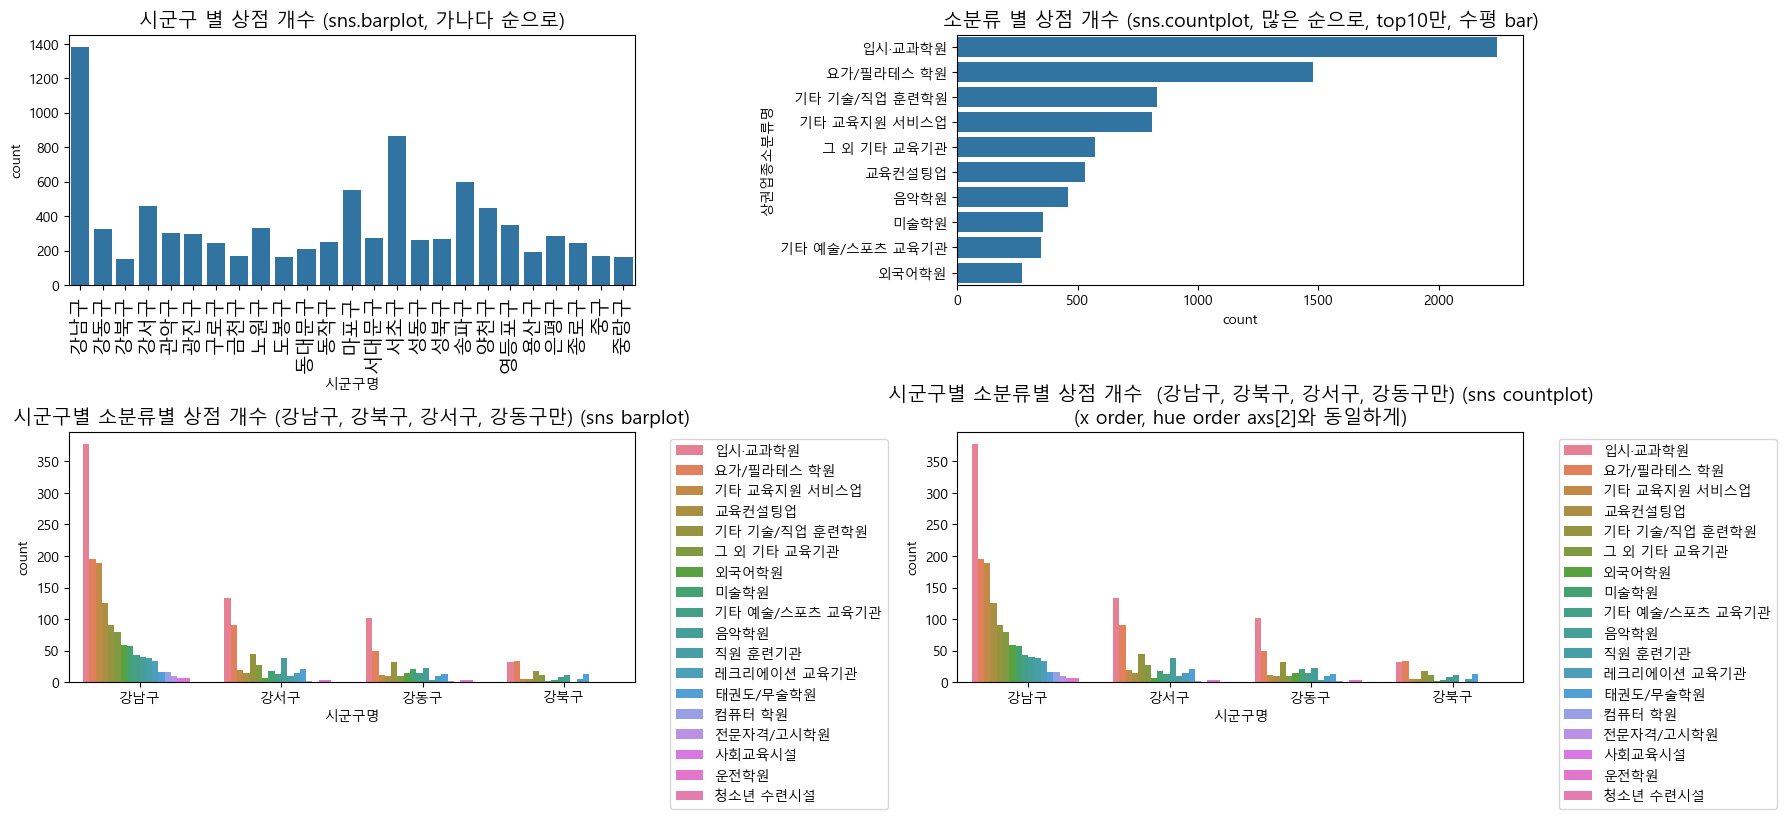

In [46]:
fig=plt.figure(figsize=(18,8),dpi=100)
axs=fig.subplots(2,2).flatten()

_=axs[0].set_title('시군구 별 상점 개수 (sns.barplot, 가나다 순으로)', fontsize=14)
sr2=df_aca['시군구명'].value_counts().sort_index()
_=sns.barplot(sr2, ax=axs[0])
_=axs[0].tick_params(axis='x', rotation=90, labelsize=14)

_=axs[1].set_title('소분류 별 상점 개수 (sns.countplot, 많은 순으로, top10만, 수평 bar)', fontsize=14)
ind_order=df_aca['상권업종소분류명'].value_counts().head(10).index
_=sns.countplot(data=df_aca, y='상권업종소분류명', order=ind_order, ax=axs[1])

## df_aca_4gu
df_aca_4gu=df_aca.loc[df_aca['시군구명'].isin(['강남구', '강북구', '강서구', '강동구'])]

_=axs[2].set_title('시군구별 소분류별 상점 개수 (강남구, 강북구, 강서구, 강동구만) (sns barplot)', fontsize=14)
df2=df_aca_4gu[['시군구명','상권업종소분류명']].value_counts().reset_index()
df2
_=sns.barplot(data=df2, x='시군구명', y='count', hue='상권업종소분류명',ax=axs[2])
_=axs[2].legend(bbox_to_anchor=(1.05,1),loc=2)

_=axs[3].set_title('시군구별 소분류별 상점 개수  (강남구, 강북구, 강서구, 강동구만) (sns countplot)\n(x order, hue order axs[2]와 동일하게)', fontsize=14)
handles, hue_labels = axs[2].get_legend_handles_labels()
xtick_labels = [tick.get_text() for tick in axs[2].get_xticklabels()]

_=sns.countplot(data=df_aca_4gu, x='시군구명',hue='상권업종소분류명',
                order=xtick_labels, hue_order=hue_labels,
                ax=axs[3])
_=axs[3].legend(bbox_to_anchor=(1.05,1),loc=2)

fig.tight_layout()

## 실습5) df_aca에서 시군구별로 가장많은 소분류와 그 개수 시각화 하기
* value_counts, drop_duplicates 사용

In [7]:
df_aca.head(1)

,상가업소번호,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
15,MA0101202309A0091330,에이치티교육,교육,교육 지원,기타 교육지원 서비스업,기타 교육지원 서비스업,서울특별시,관악구,서원동,신림동,대지,10.0,서울특별시 관악구 신림동 10-463,서울특별시 관악구 남부순환로194길,46.0,서울특별시 관악구 남부순환로194길 46,126.934823,37.482652


top소분류
강남구(입시·교과학원)          378
양천구(입시·교과학원)          202
서초구(입시·교과학원)          178
송파구(입시·교과학원)          154
노원구(입시·교과학원)          134
강서구(입시·교과학원)          133
강동구(입시·교과학원)          102
마포구(입시·교과학원)           97
은평구(입시·교과학원)           94
서대문구(입시·교과학원)          78
광진구(입시·교과학원)           76
성북구(입시·교과학원)           74
관악구(입시·교과학원)           70
영등포구(요가/필라테스 학원)       67
동작구(입시·교과학원)           67
구로구(입시·교과학원)           53
도봉구(입시·교과학원)           51
동대문구(입시·교과학원)          50
성동구(요가/필라테스 학원)        49
종로구(기타 기술/직업 훈련학원)     48
용산구(요가/필라테스 학원)        44
강북구(요가/필라테스 학원)        34
중랑구(입시·교과학원)           31
중구(요가/필라테스 학원)         28
금천구(입시·교과학원)           25
Name: 상점수, dtype: int64

<Axes: xlabel='상점수', ylabel='top소분류'>

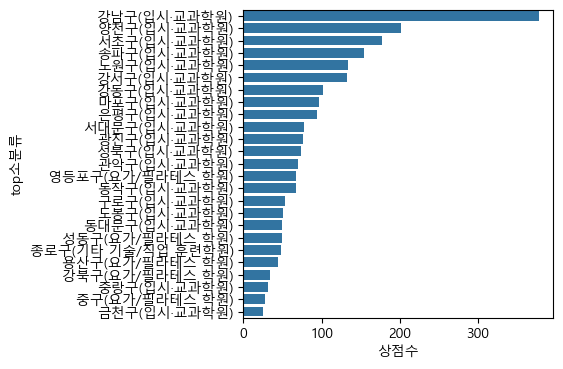

In [22]:
fig=plt.figure(figsize=(4,4),dpi=100)
ax1=fig.subplots()

df5=df_aca[['시군구명','상권업종소분류명']]
aca_cnt=df5.value_counts().reset_index().drop_duplicates(subset='시군구명')

aca_cnt['ind']=aca_cnt['시군구명']+'('+aca_cnt['상권업종소분류명'] + ')'
aca_cnt=aca_cnt.drop(columns=['시군구명','상권업종소분류명']).rename(columns={'count':'상점수', 'ind':'top소분류'})
aca_cnt=aca_cnt.set_index('top소분류')['상점수']
aca_cnt

sns.barplot(aca_cnt, orient='h', ax=ax1)

## 실습6) "입시·교과학원",'요가/필라테스 학원' 경도 위도 scatterplot 하기

In [ ]:
# 가운데점 (아래하) 입력 방법: '한글ㄱ' + '한자' + 'Tab 한번' + '오른쪽방향키' + '숫자 8'

<Axes: xlabel='경도', ylabel='위도'>

<Axes: xlabel='경도', ylabel='위도'>

<Axes: xlabel='count', ylabel='시군구명'>

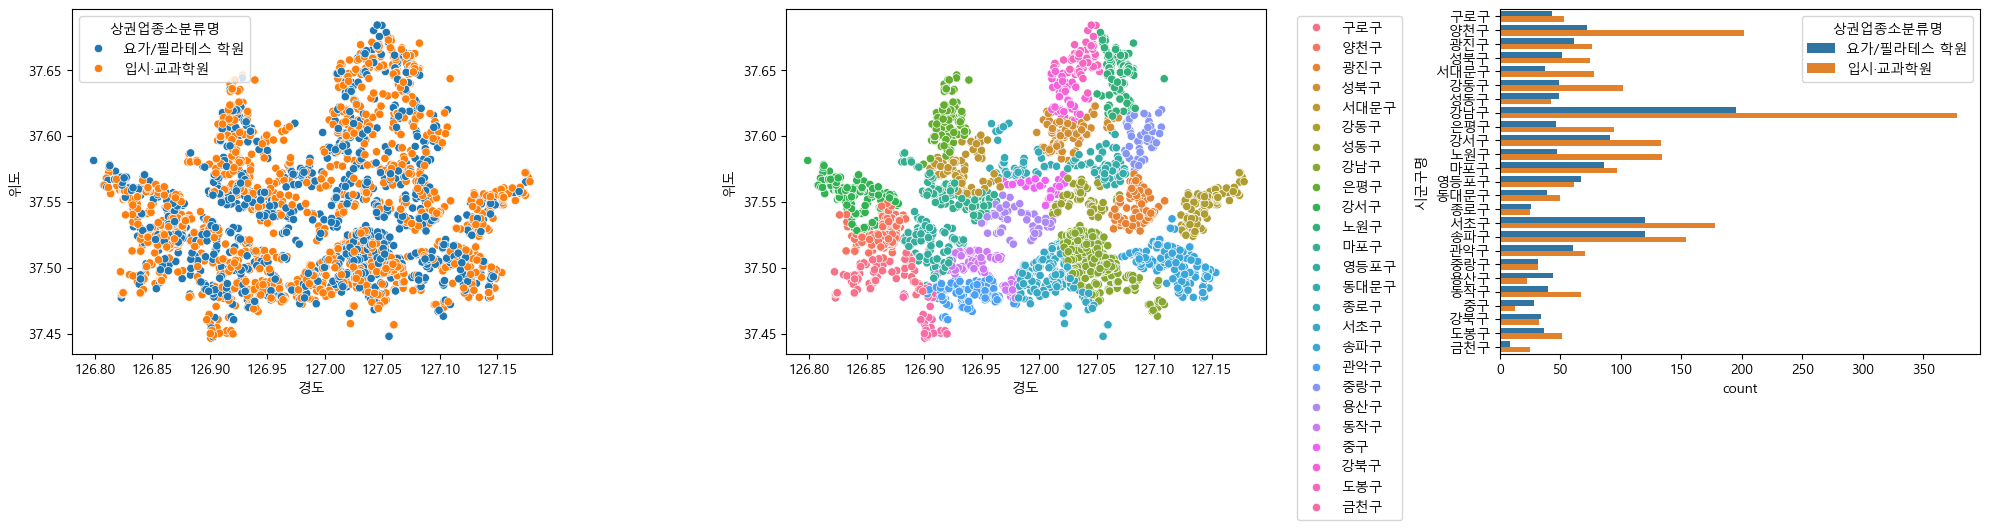

In [29]:
fig=plt.figure(figsize=(20, 5), dpi=100)
axs=fig.subplots(1,3).flatten()

df_aca = dfs.loc[(dfs["시도명"] == "서울특별시") & (dfs["상권업종대분류명"] == "교육")].copy()
df_aca_sub=df_aca.loc[df_aca["상권업종소분류명"].isin(["입시·교과학원",'요가/필라테스 학원'])]
# axs[0]: 소분류명 별로 색깔 다르게
sns.scatterplot(data=df_aca_sub,x="경도", y="위도", hue="상권업종소분류명", ax=axs[0])

# axs[1]: 시군구명 별로 색깔 다르게
sns.scatterplot(data=df_aca_sub,x="경도", y="위도", hue="시군구명", ax=axs[1])
axs[1].legend(bbox_to_anchor=(1.05,1),loc=2)

# axs[2]: 시군구별, 소분류명별 상점수
sns.countplot(data=df_aca_sub, y='시군구명',hue='상권업종소분류명', ax=axs[2])

fig.tight_layout(h_pad=3)